# Starbucks Capstone Challenge

### Problem Statement / Overview

This project is focused on the topic over offer recommendations on the Starbucks rewards mobile app. Nowadays, members are more and more willingly to spend through online order and offer could play a big role in user's engagement and transactions. With the data on customers' profile, offers'characteristic, all transaction details, it could help the business understand the current offer mechanism,
- Who are the cusomters active on Starbuck rewards mobile app? Who spent more frequently through offers?
- Which offer are more popular with higher usage? Which offer are more effective with impact on customers' spent behavior?

At the same time, with the interactions between users and offer, it enpower us to build up a recommendation system which could help to realize more revenues through the Starbucks rewards mobile app, basically enable us to uncover the user-offer pair with highest posibility of transactions and provided the answer for the question below,
- Who are the users we need to send the offer and what type of offer we need to send?

In addtion, the analysis on the current situation would help us to uncover our new potential customers who would be involved in the recommendation system once they registed in the app. The offer insight on the other hand could help to review the current offer designing, provision any potentials on offer adjustment or new offer design.

### 1. Introduction / Background

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. 

- An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). 

- Some users might not receive any offer during certain weeks and not all users receive the same offer.

- Every offer has a validity period before the offer expires. 

> Example A:  a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

> Example B:  a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

- You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products. Couple notes keeping in mind:
- Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. 
> For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

- You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. 
> From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.


### 2. Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record



In [39]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline
import os
print(os.getcwd())
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

/Users/apple/Desktop/project/Udacity/data_scientist/capstone-starbuck


In [40]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json')

In [41]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [42]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [43]:
transcript=transcript.sort_index()
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{u'offer id': u'9b98b8c7a33c4b65b9aebfe6a799e6...
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{u'offer id': u'0b1e1539f2cc45b7b9fa7c272da2e1...
2,offer received,e2127556f4f64592b11af22de27a7932,0,{u'offer id': u'2906b810c7d4411798c6938adc9daa...
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{u'offer id': u'fafdcd668e3743c1bb461111dcafc2...
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{u'offer id': u'4d5c57ea9a6940dd891ad53e9dbe8d...


In [44]:
print (portfolio.shape, profile.shape,transcript.shape)

((10, 6), (17000, 5), (306534, 4))


### 3. Data Cleaning

##### Portfolio Dataset

The portfolio dataset is the offer meta data, which contains offer ids and meta data about each offer (duration, type, etc). The dataset has no null value, but there are couple columns which needed to preprocess,

- Split the channels column into several columns
- Set dummy variables on offer_type


In [45]:
portfolio.dtypes

channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object

In [46]:
portfolio.isnull().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

In [47]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [48]:
def portfolio_cleanup(portfolio):
    
    # Process offer_type column and set dummy variables 
    offer_type=pd.get_dummies(portfolio['offer_type'])
    
    # Process the channels column and split in to multiple columns
    portfolio['email']=portfolio['channels'].apply(lambda x: 1 if 'email' in x else 0)
    portfolio['mobile']=portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
    portfolio['social']=portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)
    portfolio['web']=portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)
    
    # Merge the offer_type dummy variables to the Portfolio dataset
    portfolio=portfolio.merge(offer_type,how='left',left_index=True, right_index=True)
    portfolio.drop(['offer_type','channels'],axis=1,inplace=True)
    
    return portfolio
       

In [49]:
portfolio=portfolio_cleanup(portfolio)
portfolio=portfolio[['id','difficulty','duration','reward','email','mobile','social','web','bogo','discount','informational']]
portfolio.head()

,id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0


###### Profile Dataset

The profile dataset is about demographic data for each customer, which includes age, gender, income info. The dataset has 17000 records and 2175 out of which records with null in gender and income. All the records are the unique row with distinct customer id and there is no duplicate records. 

Couple columns need to be processed are listed below,

- Update the data type for the column became_member_on 
- Add one column on the term length that the customer become a member


In [50]:
# Check the type in each column
profile.dtypes

age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object

In [51]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [52]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [53]:
# Check if there is any duplicated customer info
profile['id'].nunique()

17000

In [54]:
# Update the data type on the date that customer become the member
profile['became_member_on_date']=pd.to_datetime(profile['became_member_on'].astype(str),format='%Y%m%d')
profile=profile.drop(['became_member_on'], axis=1)
# Add the column member_days to obtain the length since customer became a member
profile['member_days']=profile['became_member_on_date'].apply(lambda x: (datetime.datetime.today()-x).days)

###### Transcript Dataset

The transcript dataset contains records for transactions, offers received, offers viewed, and offers completed. It has 306534 records and there is no null records. 

For the processing,

   - The value column contains dict type which needs transformations.
   - Transform the dataset based on event.


In [55]:
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [56]:
transcript.dtypes

event     object
person    object
time       int64
value     object
dtype: object

#### Processing on the value column

In [57]:
set(transcript.event.values)

{u'offer completed', u'offer received', u'offer viewed', u'transaction'}

In [58]:
# Split the 'value' column based on key 
transcript['amount']=transcript['value'].apply(lambda x:x['amount'] if 'amount' in x else None)
transcript['offerid']=transcript['value'].apply(lambda x:x['offer id'] if 'offer id' in x.keys() else (x['offer_id'] if 'offer_id' in x.keys() else None))
transcript['reward']=transcript['value'].apply(lambda x:x['reward'] if 'reward' in x else None)
# Drop the original 'value' column
transcript=transcript.drop(['value'], axis=1)

### 4.Data Transformation

#### a. transcript dataset

Based on the info below, we could see
- If the person received and viewed offer, only offerid will be associated with that person.
- If the person completed offer, the offerid and reward will be generated.
- If the person finished transaction, only amount will be recorded.

If one offer is being received, viewed, and completed by a customer, the offerid will be the field associated with person through all three events.

Based on the customer's journey, as we know the user will start from receiving offer or not, moving to view, complete the offer and finished the transaction. 

One thing need to notice is the time along with the customer's journey,

> a. The time on offer receiving <= the time on viewing the offer  or customer didn't view the offer

> b. The time on receiving the offer <= the time on completing the offer or customers didn't complete the offer
( there are cases that the time on viewing the offer is later than the time on completing the offer )

> c. The time on completing the offer = the time for finishing the transactions

Also on the offerid, one offerid could be assgined to the users multiple times, so we need to joined the related events if the associated time is much closer.

In [59]:
# Get split dataset for each event
transcript_received=transcript[transcript['event']=='offer received']
transcript_completed=transcript[transcript['event']=='offer completed']
transcript_viewed=transcript[transcript['event']=='offer viewed']
transcript_transaction=transcript[transcript['event']=='transaction']

In [60]:
transcript_received.isnull().sum()
transcript_completed.isnull().sum()
transcript_viewed.isnull().sum()
transcript_transaction.isnull().sum()

event           0
person          0
time            0
amount          0
offerid    138953
reward     138953
dtype: int64

In [61]:
# Join the received and viewed event
transcript_sub=transcript_received.merge(transcript_viewed, on=['offerid','person'],how='left')
transcript_sub['time_x']
transcript_sub=transcript_sub.drop(['event_x','event_y','amount_x','amount_y','event_x','event_y','reward_x','reward_y'],axis=1)
transcript_sub=transcript_sub.rename(columns={"time_x":"time_received","time_y":"time_viewed"})


In [62]:
# Processing the data based on the time Make sure the time_received<=time_viewed or time_viewed is null
transcript_sub=transcript_sub[(transcript_sub['time_received']<= transcript_sub['time_viewed'])|transcript_sub['time_viewed'].isnull() ]
# pick the one that the time_viewed is closer to the time_received
transcript_sub=transcript_sub.sort_values('time_viewed').groupby(['person','offerid','time_received']).first().reset_index()


In [63]:
# Make sure one viewed offer will only be joined with one received offer
test=transcript_sub[~transcript_sub['time_viewed'].isnull()]
test['diff']=test['time_viewed']-test['time_received']
test=test.sort_values('diff').groupby(['person','offerid','time_viewed']).first().reset_index()
test.drop(['diff'],axis=1,inplace=True)
final=transcript_sub[transcript_sub['time_viewed'].isnull()].append(test)
transcript_sub=final


/Users/apple/anaconda/envs/laidata1/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
# Join the completed event
transcript_sub2=transcript_sub.merge(transcript_completed, on=['offerid','person'],how='left')
transcript_sub2=transcript_sub2.drop(['event','amount'],axis=1)
transcript_sub2=transcript_sub2.rename(columns={'time':'time_completed'})


In [65]:
# Processing the data based on the time 
# Make sure the time_viewed<=time_completed
transcript_sub2=transcript_sub2[(transcript_sub2['time_received']<=transcript_sub2['time_completed']) | transcript_sub2['time_completed'].isnull()]

# pick the one that the time_completed is closer to the time_received
transcript_sub2=transcript_sub2.sort_values('time_completed').groupby(['person','offerid','time_received']).first().reset_index()

In [66]:
# Make sure one viewed offer will only be joined with one received offer
test2=transcript_sub2[~transcript_sub2['time_completed'].isnull()]
test2['diff']=test2['time_completed']-test2['time_received']
test2=test2.sort_values('diff').groupby(['person','offerid','time_completed']).first().reset_index()
test2.drop(['diff'],axis=1,inplace=True)
final2=transcript_sub2[transcript_sub2['time_completed'].isnull()].append(test2)
transcript_sub2=final2

/Users/apple/anaconda/envs/laidata1/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
# Join the transaction data
# This will join all the behavior if there is a complete transaction
transcript_sub3=transcript_sub2.merge(transcript_transaction, left_on=['person','time_completed'],right_on=['person','time'],how='right')
transcript_sub3=transcript_sub3.drop(['offerid_y','reward_y','event'],axis=1)
transcript_sub3=transcript_sub3.rename(columns={'reward_x':'reward','offerid_x':'offerid','time':'time_transaction'})

In [68]:
# Get the offer and person if the they didn't complete the transaction 
transcript_incomplete=transcript_sub2[transcript_sub2['time_completed'].isnull()]
transcript_incomplete['time_transaction']=np.nan
#transcript_incomplete[transcript_incomplete['person']=='65f06566a2a14f64b003964f211635e1']

/Users/apple/anaconda/envs/laidata1/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
# Append this part the the dataset
transcript_sub3=transcript_sub3.append(transcript_incomplete)
transcript_sub3=transcript_sub3[['person','offerid','time_received','time_viewed','time_completed','time_transaction','reward','amount']]
#transcript_sub3.head()

In [32]:
#transcript_sub3[transcript_sub3['person']=='65f06566a2a14f64b003964f211635e1']

In [70]:
transcript_sub3.shape

(180422, 8)

#### b. Bring in user/offer info 

In [71]:
# Join the customer profile data
output=transcript_sub3.merge(profile,left_on=['person'],right_on=['id'],how='left')
output=output.drop(['id'],axis=1)
output.head()

,person,offerid,time_received,time_viewed,time_completed,time_transaction,reward,amount,age,gender,income,became_member_on_date,member_days
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,576,576.0,2.0,10.27,33,M,72000.0,2017-04-21,1235
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,456.0,414,414.0,5.0,8.57,33,M,72000.0,2017-04-21,1235
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,540.0,528,528.0,2.0,14.11,33,M,72000.0,2017-04-21,1235
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,408.0,432.0,576,576.0,5.0,22.05,40,O,57000.0,2018-01-09,972
4,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,516.0,576,576.0,5.0,22.05,40,O,57000.0,2018-01-09,972


In [72]:
# Join the offer portfolio data
output=output.merge(portfolio, left_on=['offerid'],right_on=['id'],how='left')
output=output.drop(['id','reward_y'],axis=1)
output=output.rename(columns={'reward_x':'reward'})
output.head()

,person,offerid,time_received,time_viewed,time_completed,time_transaction,reward,amount,age,gender,...,member_days,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,576,576.0,2.0,10.27,33,M,...,1235,10.0,7.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,456.0,414,414.0,5.0,8.57,33,M,...,1235,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,540.0,528,528.0,2.0,14.11,33,M,...,1235,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,408.0,432.0,576,576.0,5.0,22.05,40,O,...,972,20.0,10.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,516.0,576,576.0,5.0,22.05,40,O,...,972,5.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [73]:
print (profile.shape,portfolio.shape,transcript.shape)

((17000, 6), (10, 11), (306534, 6))


In [74]:
print (output.shape)

(180422, 22)


#### c. Adding 'offer_success' field to identify if the offer impacted the transaction or user's behavior

- For informational offer, if the user spent within the valid duration of informational offer, the informational offer will be viewed as s success.
- For Bogo/discount offer, if the user spent by using that specific offer, the offer will be determined as a success.

In [75]:
# Get the info associated with informational offer
output_info=output[(output['offerid']=='3f207df678b143eea3cee63160fa8bed') | (output['offerid']=='5a8bc65990b245e5a138643cd4eb9837')]
# Get the list of transaction time for each person
transaction_time=output[output['offerid'].isnull()].groupby(['person'])['time_transaction'].unique().reset_index().rename(columns={'time_transaction':'list_time_transaction'})
process_success=output.merge(transaction_time,on='person',how='left')
process_success.head()

,person,offerid,time_received,time_viewed,time_completed,time_transaction,reward,amount,age,gender,...,difficulty,duration,email,mobile,social,web,bogo,discount,informational,list_time_transaction
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,576,576.0,2.0,10.27,33,M,...,10.0,7.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,"[228.0, 552.0, 660.0, 690.0, 696.0]"
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,456.0,414,414.0,5.0,8.57,33,M,...,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,"[228.0, 552.0, 660.0, 690.0, 696.0]"
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,540.0,528,528.0,2.0,14.11,33,M,...,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,"[228.0, 552.0, 660.0, 690.0, 696.0]"
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,408.0,432.0,576,576.0,5.0,22.05,40,O,...,20.0,10.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,"[132.0, 642.0, 654.0]"
4,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,516.0,576,576.0,5.0,22.05,40,O,...,5.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,"[132.0, 642.0, 654.0]"


In [76]:
# Identify if any information offer impact the transactions per person
process_success['offer_success']=process_success.apply(lambda row: 1 
                                                       # If the offer is informational type, any transaction done by the customers is impacted by this offer
                                                       if (row.offerid=='3f207df678b143eea3cee63160fa8bed' or row.offerid=='5a8bc65990b245e5a138643cd4eb9837') and
                                                       (type(row.list_time_transaction) is np.ndarray) and 
                                                      ((row.list_time_transaction>=row.time_received)&(row.list_time_transaction<=row.time_received+row.duration*24)).any() 
                                                         else 
                                                       # If the offer is associated with each transaction and the transaction is completed
                                                       (1 if not pd.isnull(row.time_transaction) and not pd.isnull(row.offerid) else 0), axis=1)
                                                       


In [77]:
process_success.drop(['list_time_transaction'],axis=1,inplace=True)
#process_success.head()
output=process_success

### 5. Data Analysis

#### a. Customer analysis

**(1) What group of population is intended to purchase on Starbuck Rewards App?** 

Based on the overall customer profiles within Starbuck,
- There are more males enrolled as a member
- Large proportion of customers are distributed between 40 and 60, and there are 2180 (out of 1700) customers with age over 100.
- The income is slightly right-skewly distributed, and most of customers with income between 5000 and 7000.
- Based on the number of days that customer joined the membership, most of members joined 2 - 3 years ago.

On the spent behavior perspective,
- Most customers spent 5-10 times.
- Their total spent is about 0-100.

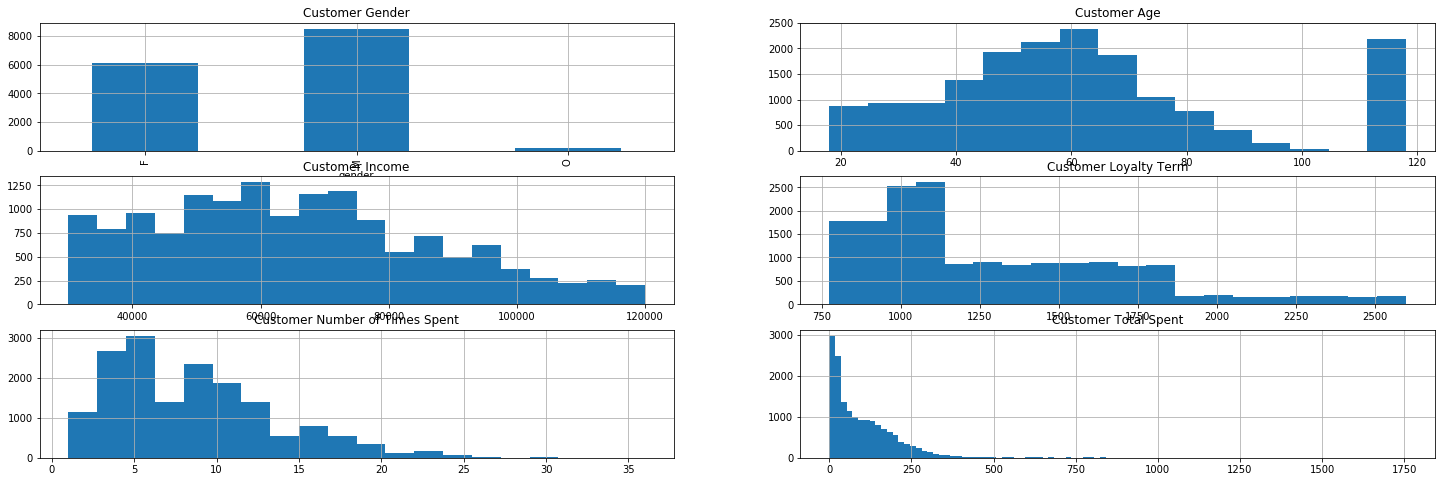

In [78]:
plt.figure(figsize=(25,8))

plt.subplot(321)
profile.groupby('gender').id.nunique().plot(kind='bar')
plt.title('Customer Gender')
plt.grid(True)

plt.subplot(322)
plt.hist(profile['age'],15)
plt.title('Customer Age')
plt.grid(True)

plt.subplot(323)
plt.hist(profile[profile['income']>0]['income'],20)
plt.title('Customer Income')
plt.grid(True)

plt.subplot(324)
plt.hist(profile['member_days'],20)
plt.title('Customer Loyalty Term')
plt.grid(True)

plt.subplot(325)
plt.hist(output[(~output['time_transaction'].isnull())].groupby(['person']).count()['time_transaction'],20)
plt.title('Customer Number of Times Spent')
plt.grid(True)

plt.subplot(326)
plt.hist(output[(~output['time_transaction'].isnull())].groupby(['person']).sum()['amount'],100)
plt.title('Customer Total Spent')
plt.grid(True)


Look at the total spend for the customers

In [79]:
spent_no_offer=output[(~output['time_transaction'].isnull())&(output['offerid'].isnull())]
not_spent_offer_unused=output[(output['time_transaction'].isnull())&(~output['offerid'].isnull())]
spent_offer=output[(~output['time_transaction'].isnull())&(~output['offerid'].isnull())]

In [43]:
#spent_offer.head()

In [80]:
# Add how many times of spent for each person using offer
spent_offer_num=spent_offer.groupby(['person','age','gender','income','member_days']).count()['offerid'].reset_index()

In [81]:
profile=profile.merge(spent_offer_num,left_on=['id'],right_on=['person'],how='left')
profile=profile.drop(['age_y','gender_y','income_y','member_days_y'],axis=1)
profile=profile.rename(columns={'age_x':"age",'gender_x':"gender",'income_x':'income','member_days_x':'member_days','offerid':'num_offer_transaction'})

In [82]:
# Add how many times of spent for each person without using an offer
spent_no_offer_num=spent_no_offer.groupby(['person','age','gender','income','member_days']).count()['time_transaction'].reset_index()

In [83]:
profile=profile.merge(spent_no_offer_num,left_on=['id'],right_on=['person'],how='left')
profile=profile.drop(['age_y','gender_y','income_y','member_days_y','person_y'],axis=1)
profile=profile.rename(columns={'person_x':'person','age_x':"age",'gender_x':"gender",'income_x':'income','member_days_x':'member_days','time_transaction':'num_transaction_no_offer'})

In [84]:
# Get the percentage of transaction through offer per customer
profile['percent_customer']=profile['num_offer_transaction']/(profile['num_offer_transaction']+profile['num_transaction_no_offer'])

** (2) Which group of population is intended to purchase through offer? **

If we look at how many offers are used by each customer out of the totoal number of purchaese (we called it as offer purchase percent), we could see:
- The profile for the customers with offer purchase percent > 60%:
    - Females are more preferred to use offer while purchasing;
    - Customers'age are more concentrated between 50 to 70, which is similar to the overall cusomters'profile;
    - The income is mostly distributed between 70k to 100k;
    - Most of users joined 2-3 years ago;
    - The total number of transaction is between 3-9 time.
    
    
- The profile for the customers with offer purchase percent < 30%:
    - Males are more preferred to use offer;
    - there are more young customers within this group ;
    - Lower income group have a higher percentage in this group;
    - Most of users joined 2-3 years ago;
    - The total number of transaction is between 4-35 time, which is broader than the group with higher offer purchase percent.

In [85]:
profile['percent_customer'].describe()

count    11561.000000
mean         0.322315
std          0.173004
min          0.033333
25%          0.187500
50%          0.300000
75%          0.428571
max          0.857143
Name: percent_customer, dtype: float64

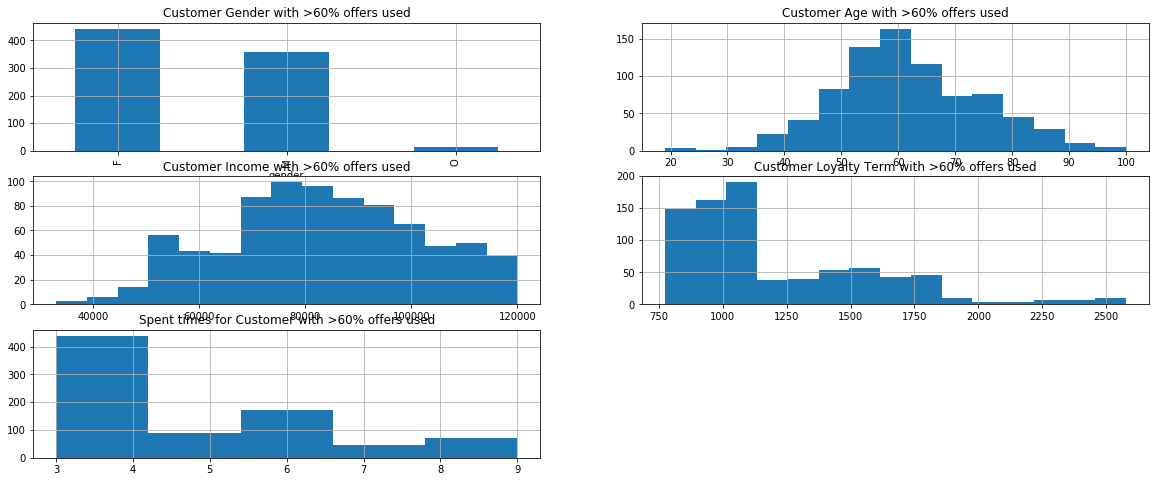

In [86]:
plt.figure(figsize=(20,8))

plt.subplot(321)
profile[profile['percent_customer']>0.6].groupby('gender').id.nunique().plot(kind='bar')
plt.title('Customer Gender with >60% offers used')
plt.grid(True)

plt.subplot(322)
plt.hist(profile[profile['percent_customer']>0.6]['age'],15)
plt.title('Customer Age with >60% offers used')
plt.grid(True)


plt.subplot(323)
plt.hist(profile[profile['percent_customer']>0.6]['income'],15)
plt.title('Customer Income with >60% offers used')
plt.grid(True)


plt.subplot(324)
plt.hist(profile[profile['percent_customer']>0.6]['member_days'],15)
plt.title('Customer Loyalty Term with >60% offers used')
plt.grid(True)

plt.subplot(325)
plt.hist(profile[profile['percent_customer']>0.6]['num_offer_transaction']+profile[profile['percent_customer']>0.6]['num_transaction_no_offer'],5)
plt.title('Spent times for Customer with >60% offers used')
plt.grid(True)


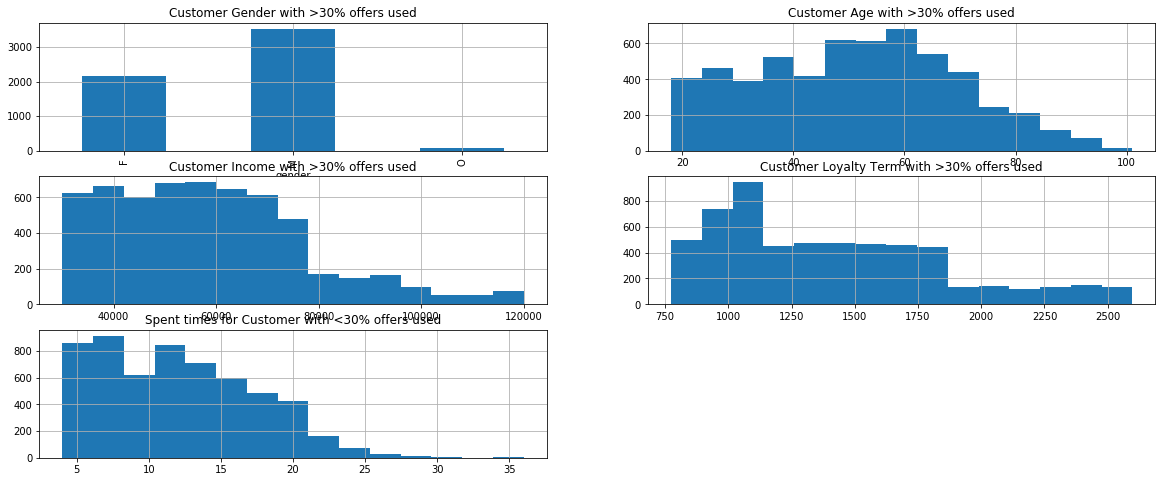

In [87]:
plt.figure(figsize=(20,8))

plt.subplot(321)
profile[profile['percent_customer']<0.3].groupby('gender').id.nunique().plot(kind='bar')
plt.title('Customer Gender with >30% offers used')
plt.grid(True)

plt.subplot(322)
plt.hist(profile[profile['percent_customer']<0.3]['age'],15)
plt.title('Customer Age with >30% offers used')
plt.grid(True)

plt.subplot(323)
plt.hist(profile[profile['percent_customer']<0.3]['income'],15)
plt.title('Customer Income with >30% offers used')
plt.grid(True)

plt.subplot(324)
plt.hist(profile[profile['percent_customer']<0.3]['member_days'],15)
plt.title('Customer Loyalty Term with >30% offers used')
plt.grid(True)

plt.subplot(325)
plt.hist(profile[profile['percent_customer']<0.3]['num_offer_transaction']+profile[profile['percent_customer']<0.3]['num_transaction_no_offer'],15)
plt.title('Spent times for Customer with <30% offers used')
plt.grid(True)

**(3) Which factors behind customers are more correlated with offer transaction? **

Based on the correlation, 
- Age, income and female gender have positive impact over the offer purchase percent.
- The length of time member stayed with Starbuck and male gender have negative impact.

In [88]:
dummy=pd.get_dummies(profile['gender'])
profile=pd.concat([profile,dummy],axis=1)


In [89]:
profile=profile[['id','age','income','member_days','F','M','O','num_offer_transaction','num_transaction_no_offer','percent_customer']]

In [90]:
corr = profile.corr()
corr.style.background_gradient(cmap='coolwarm')


,age,income,member_days,F,M,O,num_offer_transaction,num_transaction_no_offer,percent_customer
age,1,0.306703,-0.0182624,-0.140032,-0.388781,-0.0341711,0.0719646,-0.193553,0.246456
income,0.306703,1,0.0257688,0.229396,-0.225496,-0.0118077,0.148483,-0.349531,0.463687
member_days,-0.0182624,0.0257688,1,-0.00784174,0.0306968,-0.00827098,0.0933272,0.380212,-0.185626
F,-0.140032,0.229396,-0.00784174,1,-0.74945,-0.0843779,0.113167,-0.105834,0.168259
M,-0.388781,-0.225496,0.0306968,-0.74945,1,-0.112163,-0.115254,0.105525,-0.167851
O,-0.0341711,-0.0118077,-0.00827098,-0.0843779,-0.112163,1,0.00975915,-0.00081988,0.000205266
num_offer_transaction,0.0719646,0.148483,0.0933272,0.113167,-0.115254,0.00975915,1,0.0660492,0.464143
num_transaction_no_offer,-0.193553,-0.349531,0.380212,-0.105834,0.105525,-0.00081988,0.0660492,1,-0.716952
percent_customer,0.246456,0.463687,-0.185626,0.168259,-0.167851,0.000205266,0.464143,-0.716952,1


#### b. Offer Analysis

** (1) Which offer are more popular within transactions? **

From the offer involved in the transactions,
- Bogo and discount type are the major offer type in the transacions
- Offers are more diversed in channel, and email and mobile are the top 2 channels with most offers.


In [92]:
output[['bogo','discount','informational']].sum()

bogo             28470.0
discount         28395.0
informational    14571.0
dtype: float64

Text(0.5,1,u'Offer Reward')

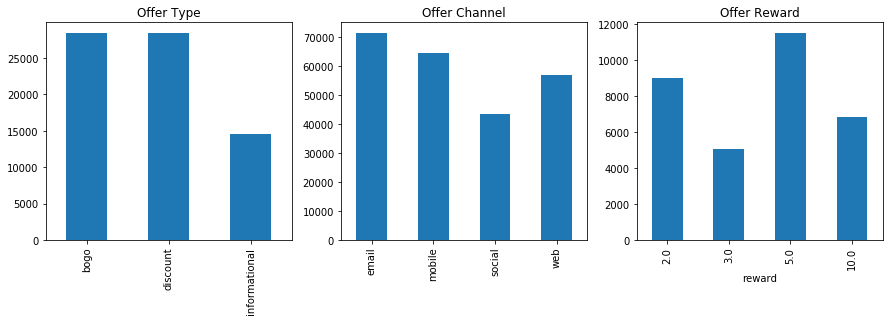

In [93]:
plt.figure(figsize=(15,4))

plt.subplot(131)
output[['bogo','discount','informational']].sum().plot(kind='bar')
plt.title('Offer Type')


plt.subplot(132)
output[['email','mobile','social','web']].sum().plot(kind='bar')
plt.title('Offer Channel')


plt.subplot(133)
output.groupby(['reward']).count()['offerid'].plot(kind='bar')
plt.title('Offer Reward')


**(2) Which offer has higher usage through transaction? **

As we could see, 
- 7 offers are evenly distributed among transactions.
- The offer with discount type have the highest percentage of usage with transaction, followed by bogo.
- The one with highest percentage usage is the offer with the id (fafdcd668e3743c1bb461111dcafc2a4)
- The offer available in all channels have the highest percent of usage, followed by the offers in  all three channels email, mobile,and web and offers. The lowest percent fall in the offers with email as the only channel.


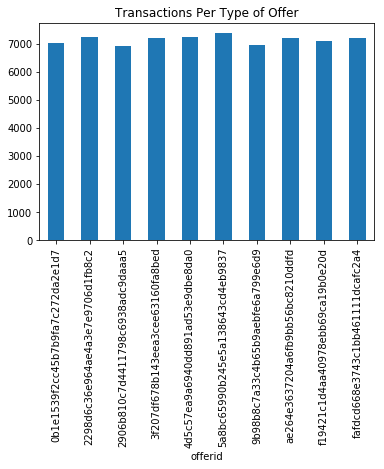

In [94]:
plt.title('Transactions Per Type of Offer')
output.groupby(['offerid']).count()['person'].plot(kind='bar')

In [95]:
# no transaction with offer
not_spent_offer_unused=output[(output['time_transaction'].isnull())&(~output['offerid'].isnull())]
# transaction with offer
spent_offer=output[(~output['time_transaction'].isnull())&(~output['offerid'].isnull())]
# offer with transaction or informational offer with transaction within its duration
effective_offer_information=output[output['offer_success']==1]

#percentage of offer being used with transaction
percent_offer=spent_offer.groupby(['offerid']).count()['person']/spent_offer.append(not_spent_offer_unused).groupby(['offerid']).count()['person']
# How many offers sent by offer type
num_offer=output.groupby(['offerid']).count()['person'].reset_index()
# Including information offer to check the impact/effectiveness of the offer
effective_offer=output[output['offer_success']==1].groupby(['offerid']).count()['person']/output.groupby(['offerid']).count()['person']


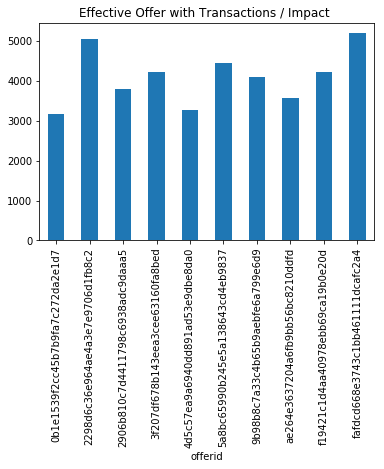

In [96]:
plt.title('Effective Offer with Transactions / Impact ')
effective_offer_information.groupby(['offerid']).count()['person'].plot(kind='bar')

Text(0.5,1,u'Used Offer Channel with Effective Impact')

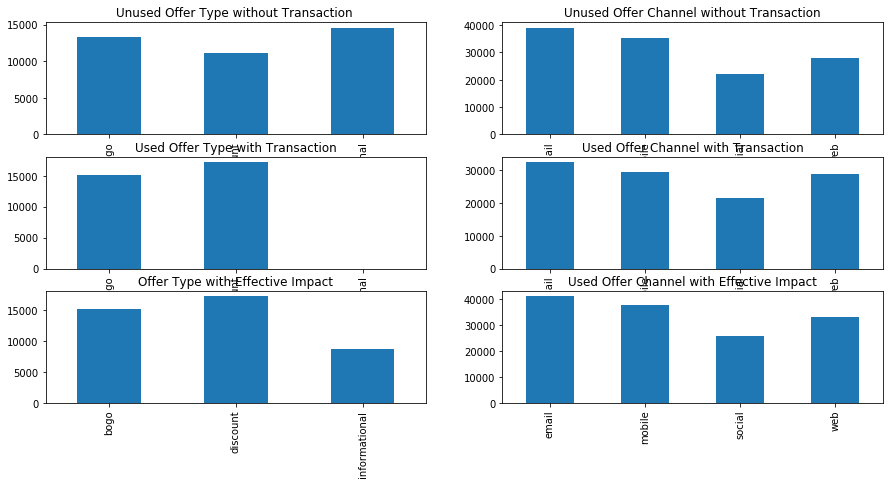

In [97]:
plt.figure(figsize=(15,7))

plt.subplot(321)
not_spent_offer_unused[['bogo','discount','informational']].sum().plot(kind='bar')
plt.title('Unused Offer Type without Transaction ')


plt.subplot(322)
not_spent_offer_unused[['email','mobile','social','web']].sum().plot(kind='bar')
plt.title('Unused Offer Channel without Transaction')

plt.subplot(323)
spent_offer[['bogo','discount','informational']].sum().plot(kind='bar')
plt.title('Used Offer Type with Transaction')


plt.subplot(324)
spent_offer[['email','mobile','social','web']].sum().plot(kind='bar')
plt.title('Used Offer Channel with Transaction')


plt.subplot(325)
effective_offer_information[['bogo','discount','informational']].sum().plot(kind='bar')
plt.title('Offer Type with Effective Impact')


plt.subplot(326)
effective_offer_information[['email','mobile','social','web']].sum().plot(kind='bar')
plt.title('Used Offer Channel with Effective Impact')

#not_spent_offer_unused.head()

In [98]:
# Add percentage of offer being used with transaction and offer effectiveness to the dataset
portfolio_copy=portfolio.merge(percent_offer.reset_index(),left_on='id',right_on='offerid',how='left')
portfolio_copy=portfolio_copy.merge(num_offer.reset_index(),left_on='id',right_on='offerid',how='left')
portfolio_copy=portfolio_copy.drop(['offerid_x','offerid_y'],axis=1)
portfolio_copy=portfolio_copy.rename(columns={"person_x":"percent_offer","person_y":"num_transaction"})

portfolio_copy=portfolio_copy.merge(effective_offer.reset_index(),left_on='id',right_on='offerid',how='left')
portfolio_copy=portfolio_copy.drop(['offerid','index'],axis=1)
portfolio_copy=portfolio_copy.rename(columns={"person":"effective_offer"})

portfolio_copy

,id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational,percent_offer,num_transaction,effective_offer
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0,0.495343,7193,0.495343
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0,0.453426,7225,0.453426
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1,NaN,7203,0.584618
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0,0.590009,6966,0.590009
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0,0.450362,7041,0.450362
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,7,3,1,1,1,1,0,1,0,0.700249,7226,0.700249
6,fafdcd668e3743c1bb461111dcafc2a4,10,10,2,1,1,1,1,0,1,0,0.719950,7213,0.719950
7,5a8bc65990b245e5a138643cd4eb9837,0,3,0,1,1,1,0,0,0,1,NaN,7368,0.603692
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5,1,1,1,1,1,0,0,0.596528,7086,0.596528
9,2906b810c7d4411798c6938adc9daaa5,10,7,2,1,1,0,1,0,1,0,0.547650,6915,0.547650


In [99]:
portfolio=portfolio_copy

In [100]:
print ("discount type - percent offer:",portfolio[portfolio['discount']==1].percent_offer.mean())
print("bogo type - percent offer:",portfolio[portfolio['bogo']==1].percent_offer.mean())

('discount type - percent offer:', 0.6045528478010396)
('bogo type - percent offer:', 0.5338263197196432)


In [101]:
portfolio.groupby(['email','mobile','social','web'])['percent_offer'].mean()

email  mobile  social  web
1      0       0       1      0.450362
       1       0       1      0.568829
               1       0      0.495343
                       1      0.617538
Name: percent_offer, dtype: float64

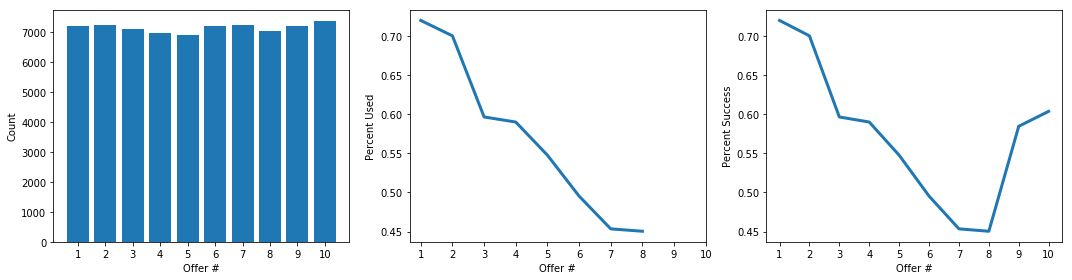

In [102]:
portfolio=portfolio.sort_values('percent_offer',ascending=False).reset_index()
f, ax = plt.subplots(figsize=(15, 4),
                     nrows=1,
                     ncols=3)

ax[0].bar(portfolio.index + 1, portfolio['num_transaction'])
ax[0].set_xticks(np.arange(0,10) + 1)
ax[0].set_xlabel('Offer #')
ax[0].set_ylabel('Count')

ax[1].plot(portfolio.index + 1,
           portfolio['percent_offer'],
           linewidth=3)
ax[1].set_xticks(np.arange(0,10) + 1)
ax[1].set_xlabel('Offer #')
ax[1].set_ylabel('Percent Used')


ax[2].plot(portfolio.index + 1,
           portfolio['effective_offer'],
           linewidth=3)
ax[2].set_xticks(np.arange(0,10) + 1)
ax[2].set_xlabel('Offer #')
ax[2].set_ylabel('Percent Success')

plt.tight_layout()

**(3) Which attribute behind offer will drive the effectiveness? **

Based on the correlation, 
- Mobile, social, web, discount type, informational type have positive impact over the offer effectiveness.
- The difficulty, reward, bogo type have negative impact.

In [103]:
corr = portfolio.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/apple/anaconda/envs/laidata1/lib/python2.7/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


,index,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational,percent_offer,num_transaction,effective_offer
index,1,-0.103831,0.00790446,-0.604152,nan,0.0580259,0,0.174078,-0.426401,0.426401,0,0.462386,-0.228698,0.44167
difficulty,-0.103831,1,0.808414,0.465686,nan,-0.741058,-0.154957,0.244007,-0.0295157,0.597692,-0.695872,-0.53125,-0.404286,-0.458409
duration,0.00790446,0.808414,1,0.160262,nan,-0.529756,-0.185376,0.340557,-0.185376,0.741504,-0.681115,0.197781,-0.423193,0.0591407
reward,-0.604152,0.465686,0.160262,1,nan,-0.0784314,0.288175,-0.117647,0.792482,-0.288175,-0.617647,-0.692196,-0.101353,-0.611013
email,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mobile,0.0580259,-0.741058,-0.529756,-0.0784314,nan,1,0.408248,-0.166667,0.272166,-0.408248,0.166667,0.465331,0.260621,0.474364
social,0,-0.154957,-0.185376,0.288175,nan,0.408248,1,-0.408248,0.25,-0.166667,-0.102062,0.319809,0.699053,0.291125
web,0.174078,0.244007,0.340557,-0.117647,nan,-0.166667,-0.408248,1,-0.102062,0.408248,-0.375,0.289186,-0.521623,0.141742
bogo,-0.426401,-0.0295157,-0.185376,0.792482,nan,0.272166,0.25,-0.102062,1,-0.666667,-0.408248,-0.366393,-0.162397,-0.37871
discount,0.426401,0.597692,0.741504,-0.288175,nan,-0.408248,-0.166667,0.408248,-0.666667,1,-0.408248,0.366393,-0.279061,0.284999


#### c. Transaction

From the transaction distribution, 
- Overall, the total expense for each customer are mostly distributed between 0-500 and the average expense are between 0-50.
- For transactions with activated offer, the total expense is aligned with the overall transactions distribution but the average expense is more concentrated between 20-50.
- Purchases with spent less than 10 are mostly not through the provided offer, which might be the requirement behind the offer that u need to spend more than 10 bucks probably.

Text(0.5,1,u'Average Expense per customers without offer Distribution ')

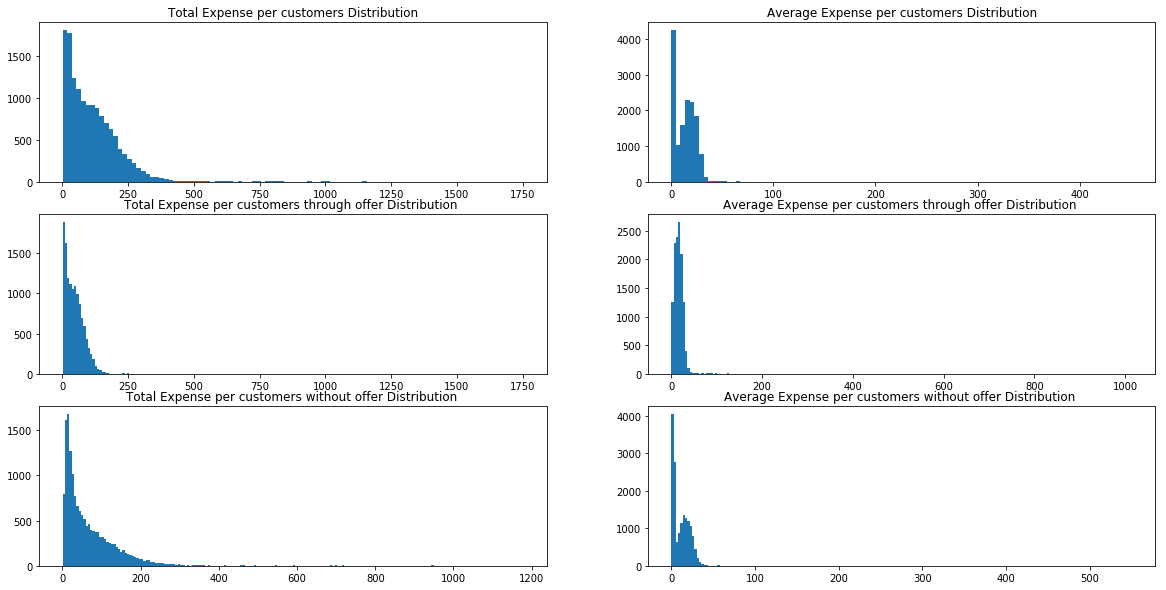

In [104]:
plt.figure(figsize=(20,10))

plt.subplot(321)
plt.hist(output[~output['time_transaction'].isnull()].groupby(['person','age','gender','income','member_days']).amount.sum(),100)
plt.title('Total Expense per customers Distribution')

plt.subplot(322)
plt.hist(output[~output['time_transaction'].isnull()].groupby(['person','age','gender','income','member_days']).amount.mean(),100)
plt.title('Average Expense per customers Distribution')

plt.subplot(323)
plt.hist(output[(~output['time_transaction'].isnull())&(~output['time_completed'].isnull())].groupby(['person']).amount.sum(),200)
plt.title('Total Expense per customers through offer Distribution ')

plt.subplot(324)
plt.hist(output[(~output['time_transaction'].isnull())&(~output['time_completed'].isnull())].groupby(['person']).amount.mean(),200)
plt.title('Average Expense per customers through offer Distribution ')

plt.subplot(325)
plt.hist(output[(~output['time_transaction'].isnull())&(output['time_completed'].isnull())].groupby(['person']).amount.sum(),200)
plt.title('Total Expense per customers without offer Distribution ')

plt.subplot(326)
plt.hist(output[(~output['time_transaction'].isnull())&(output['time_completed'].isnull())].groupby(['person']).amount.mean(),200)
plt.title('Average Expense per customers without offer Distribution ')


In [105]:
corr = output.corr()
corr.style.background_gradient(cmap='coolwarm')

,time_received,time_viewed,time_transaction,reward,amount,age,income,member_days,difficulty,duration,email,mobile,social,web,bogo,discount,informational,offer_success
time_received,1,0.986055,0.96145,0.00956047,0.00741684,0.00148561,7.24875e-06,-0.000232187,-0.0020609,-0.00318659,nan,0.00295791,0.00235362,0.00503294,0.00196254,2.49926e-05,-0.00241491,0.0349698
time_viewed,0.986055,1,0.962486,0.0123491,0.00875096,0.00191416,-0.00246862,0.00104664,0.00182357,-0.00128963,nan,-0.0120775,-0.0165957,0.00315707,-0.00185071,-0.000640723,0.00310429,0.0198302
time_transaction,0.96145,0.962486,1,-0.0225189,0.00855626,0.00636529,0.00815921,-0.00700291,0.0457375,0.0441243,nan,-0.0510419,-0.0517515,0.0111563,-0.0370687,0.0370687,nan,0.0401733
reward,0.00956047,0.0123491,-0.0225189,1,0.0461291,-0.0226327,0.0719313,-0.0280221,0.0726691,-0.471765,nan,-0.0100604,0.233311,-0.617579,0.759068,-0.759068,nan,nan
amount,0.00741684,0.00875096,0.00855626,0.0461291,1,-0.0291699,0.23446,-0.0277019,0.0561646,0.0040144,nan,-0.0450856,-0.0102147,-0.0304422,0.0100656,-0.0100656,nan,0.133031
age,0.00148561,0.00191416,0.00636529,-0.0226327,-0.0291699,1,0.282452,-0.0463165,-0.00392597,-0.00548167,nan,0.00325662,7.96306e-05,0.00244998,0.00412931,-0.00481881,0.000835151,-0.0513004
income,7.24875e-06,-0.00246862,0.00815921,0.0719313,0.23446,0.282452,1,-0.0209646,-0.00275497,-0.000266131,nan,0.00589142,0.00554739,0.00173358,0.000117389,0.00158183,-0.00206278,0.171671
member_days,-0.000232187,0.00104664,-0.00700291,-0.0280221,-0.0277019,-0.0463165,-0.0209646,1,0.0017199,0.00220576,nan,-0.00103134,0.000334468,-0.00368852,0.000376887,-0.00165623,0.00155355,0.00211409
difficulty,-0.0020609,0.00182357,0.0457375,0.0726691,0.0561646,-0.00392597,-0.00275497,0.0017199,1,0.8086,nan,-0.737695,-0.152241,0.2487,-0.0186547,0.59573,-0.700844,-0.0801161
duration,-0.00318659,-0.00128963,0.0441243,-0.471765,0.0040144,-0.00548167,-0.000266131,0.00220576,0.8086,1,nan,-0.526061,-0.182195,0.344891,-0.179764,0.74328,-0.684288,0.0113564


### 6. User-Offer Recommendation 

In order to provide the offer to the targetted user with transaction succeed, we will use two ways to build up the recommendations:

- Collaborative filter based on the clustering method

- Build the user-offer matrix and utilize FunkSVD built up the recommendation

#### A. Clustering Method

In [123]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from numpy import unique
## Collaborative Filtering Model
output.columns

Index([               u'person',               u'offerid',
               u'time_received',           u'time_viewed',
              u'time_completed',      u'time_transaction',
                      u'reward',                u'amount',
                         u'age',                u'gender',
                      u'income', u'became_member_on_date',
                 u'member_days',            u'difficulty',
                    u'duration',                 u'email',
                      u'mobile',                u'social',
                         u'web',                  u'bogo',
                    u'discount',         u'informational',
               u'offer_success'],
      dtype='object')

In [108]:
# Preprocess the portfolio dataset
dataset_portfolio=portfolio[['id','difficulty','duration','reward','email','mobile','social','web','bogo','discount',
                            'informational','effective_offer','num_transaction']]
dataset_portfolio=dataset_portfolio.set_index('id')
portfolio_list=list(dataset_portfolio.index)

In [112]:
# Preprocess the member profile dataset

user_list=list(profile['id'])
X_profile=profile.set_index('id')
X_profile=X_profile.fillna(0)

#Standardize the data
scaler = MinMaxScaler()
scaler=scaler.fit(X_profile)
X_profile = scaler.transform(X_profile)


##### Portfolio Clustering

Text(0,0.5,u'SSE')

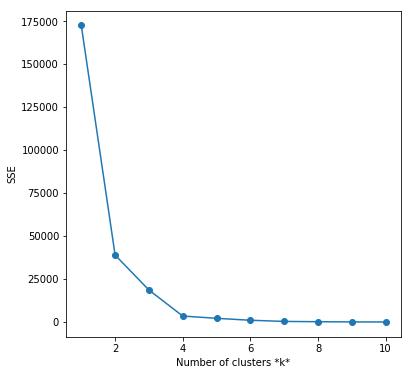

In [160]:
X_input=dataset_portfolio.values

# Pick the K value which will have the minimized SSE
sse=[]
k_range=list(range(1,11))

for k in k_range:
    # Define model
    model = KMeans(n_clusters=k,init='k-means++', max_iter=500, n_init=15)
    # fit the model
    model.fit(X_input)
    sse.append(model.inertia_)
    
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(k_range, sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('SSE')

In [156]:
# Define model using the optimized cluster number
model = KMeans(n_clusters=4,init='k-means++', max_iter=500, n_init=15)
# fit the model
model.fit(X_input)
# assign a cluster to each example
yhat = model.predict(X_input)
# retrieve unique clusters
clusters=unique(yhat)
    
# Cluster output into a dataframe
df=pd.DataFrame()
df['id']=portfolio_list
df['Cluster']=yhat
df=df.sort_values(['Cluster'])

df

,id,Cluster
0,fafdcd668e3743c1bb461111dcafc2a4,0
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0
5,ae264e3637204a6fb9bb56bc8210ddfd,0
6,4d5c57ea9a6940dd891ad53e9dbe8da0,0
8,3f207df678b143eea3cee63160fa8bed,0
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,1
4,2906b810c7d4411798c6938adc9daaa5,1
9,5a8bc65990b245e5a138643cd4eb9837,2
2,f19421c1d4aa40978ebb69ca19b0e20d,3
7,0b1e1539f2cc45b7b9fa7c272da2e1d7,3


###### members clustering

Text(0,0.5,u'SSE')

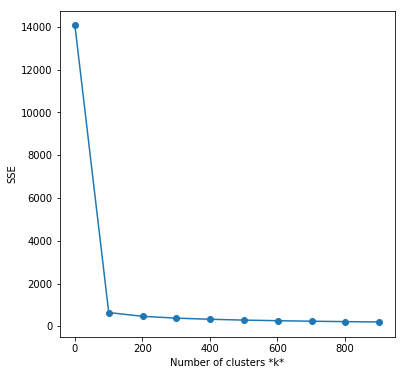

In [161]:
# Clustering

# Pick the K value which will have the minimized SSE
sse=[]
k_range=list(range(1,1000,100))

for k in k_range:
    # Define model
    model = KMeans(n_clusters=k,init='k-means++', max_iter=500, n_init=15)
    # fit the model
    model.fit(X_profile)
    
    sse.append(model.inertia_)
    
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(k_range, sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('SSE')


In [162]:
# Define model
model = KMeans(n_clusters=100,init='k-means++', max_iter=500, n_init=15)
# fit the model
model.fit(X_profile)
# assign a cluster to each example
yhat = model.predict(X_profile)
# retrieve unique clusters
clusters=unique(yhat)
    
# Cluster output into a dataframe
df1=pd.DataFrame()
df1['id']=user_list
df1['Cluster']=yhat
df1=df1.sort_values(['Cluster'])

In [163]:
def get_member(id):
    """
    the function is designed to get the closing ids based on the input
    
    input:
    id (string) - the member id
    output:
    dataframe - the id which are grouped in the cluster with its deal transaction
    """
    
    cluster_name=df1[df1['id']==id]['Cluster'].values[0]
    
    return df1[df1['Cluster']==cluster_name]
        

In [164]:
def member_recommend_list(user_id):
    
    """
    the function is designed provide suggestion based on the input user id
    
    input:
    id (string) - the member id
    output:
    result (dataframe) - the suggested offer dataframe from the highest offer succes rate to the lowest
    """
    
    # Get the similar users
    neighbor=get_member(user_id)
    # Get the the offer in for each neighbors
    neighbor_users=neighbor['id']
    # Get the matched id with its offer
    neighbor_offers=output[output['person'].isin(neighbor_users)]
    
    offer_success=neighbor_offers.groupby(['offerid'])['offer_success'].sum().reset_index()
    #print( type(offer_success))
    offer_total=neighbor_offers.groupby(['offerid'])['person'].count().reset_index()
    #print(offer_total)
    result=offer_total.merge(offer_success,on='offerid',how='left')
    result['percent']=result['offer_success']/result['person']
    result=result.sort_values(by=['percent'],ascending=False)
    print(result)
    
        

In [165]:
member_recommend_list('fff3ba4757bd42088c044ca26d73817a')

                            offerid  person  offer_success   percent
1  2298d6c36e964ae4a3e7e9706d1fb8c2      55             54  0.981818
9  fafdcd668e3743c1bb461111dcafc2a4      53             52  0.981132
6  9b98b8c7a33c4b65b9aebfe6a799e6d9      47             46  0.978723
8  f19421c1d4aa40978ebb69ca19b0e20d      31             29  0.935484
7  ae264e3637204a6fb9bb56bc8210ddfd      44             39  0.886364
4  4d5c57ea9a6940dd891ad53e9dbe8da0      63             53  0.841270
2  2906b810c7d4411798c6938adc9daaa5      43             36  0.837209
0  0b1e1539f2cc45b7b9fa7c272da2e1d7      55             44  0.800000
3  3f207df678b143eea3cee63160fa8bed      51             40  0.784314
5  5a8bc65990b245e5a138643cd4eb9837      74             50  0.675676


#### B. Matrix Factorization

In [70]:
def create_matrix(input_data):
    '''
    Return the user/offer matrix that indicate the number of transaction complete for each user-offer pair
    
    INPUT:
    input_data - a cleaned dataset including portfolio, profile, and transcript dataset
    
    OUTPUT:
    user_item_matrix - the user-offer matrix 
    row is user, column is offer, and the value is the number of offer complete by the user (NaN means no offer given)
    
    '''
    # Get the dataset including completed transaction
    offer=input_data[~input_data['time_completed'].isnull()]

    # Matrix setup
    user_item_matrix=offer.groupby(['person', 'offerid'])['time_completed'].agg("count").unstack()
    
    return user_item_matrix

In [69]:
output_matrix=create_matrix(output)
output_matrix.head()

offerid,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,2906b810c7d4411798c6938adc9daaa5,4d5c57ea9a6940dd891ad53e9dbe8da0,9b98b8c7a33c4b65b9aebfe6a799e6d9,ae264e3637204a6fb9bb56bc8210ddfd,f19421c1d4aa40978ebb69ca19b0e20d,fafdcd668e3743c1bb461111dcafc2a4
person,,,,,,,,
0009655768c64bdeb2e877511632db8f,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0
0011e0d4e6b944f998e987f904e8c1e5,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
0020c2b971eb4e9188eac86d93036a77,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
0020ccbbb6d84e358d3414a3ff76cffd,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN
003d66b6608740288d6cc97a6903f4f0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [71]:
# Set up Train / Test group
def train_test_split(output,percent=0.7):
    ''' 
    Build the train/test dataset
    '''
    train_size=int(output[~output['time_completed'].isnull()].shape[0]*percent)
    test_size=output[~output['time_completed'].isnull()].shape[0]-train_size
    train_offer=output[:train_size]
    test_offer=output[train_size:]
    
    user_item_train=create_matrix(df_train)
    user_item_test=create_matrix(df_test)
    
    return user_item_train, user_item_test


In [72]:
user_item_train, user_item_test = create_test_and_train_user_item(output)

In [100]:
def fit(user_item_matrix, latent_features=10, learning_rate=0.0001, iterations=100):
    ''' 
    Build FunkSVD in order to decompose one matrix into user and offer matrix 
    '''
    # Shape - Input metrix
    n_users =user_item_matrix.shape[0] 
    n_offers = user_item_matrix.shape[1]
    num_complete = np.count_nonzero(~np.isnan(user_item_matrix))
    
    # initialize user / offer matrix with random values
    user_matrix = np.random.rand(n_users, latent_features)
    offer_matrix = np.random.rand(latent_features, n_offers)
    
    # initialize sse 
    sse = 0
    
    # Output
    print("FunkSVD Result")
    print("Iterations | Mean Squared Error ")
    
    for iter in range(iterations):
        sse = 0
        
        # For each user-offer pair
        for user in range(n_users):
                for offer in range(n_offers):
                    if ~np.isnan(user_item_matrix[user,offer]):
                    # compute the error
                        error=user_item_matrix[user,offer]-np.dot(user_matrix[user,:],offer_matrix[:,offer])
                    # MSE for the matrix
                        sse += error**2
                    # update the values in each matrix 
                        user_matrix[user, :] =user_matrix[user, :]+ learning_rate * 2 * error * offer_matrix[:,offer].transpose()
                        offer_matrix[:,offer]=offer_matrix[:,offer]+learning_rate * 2 * error * user_matrix[user,:].transpose()
        # print results
        print(iter+1,'\t   | ', round(sse / num_complete,5))
    return user_matrix, offer_matrix 

In [101]:
# Create user-by-item matrix 
train_data_np = np.array(user_item_train)

# Fit FunkSVD to the training data
user_mat, offer_mat = fit(train_data_np, latent_features=12, learning_rate=0.005, iterations=250)

FunkSVD Result
Iterations | Mean Squared Error 
1 	   |  0.20719
2 	   |  0.15548
3 	   |  0.15349
4 	   |  0.15183
5 	   |  0.15021
6 	   |  0.14863
7 	   |  0.14708
8 	   |  0.14556
9 	   |  0.14407
10 	   |  0.14261
11 	   |  0.14118
12 	   |  0.13977
13 	   |  0.1384
14 	   |  0.13705
15 	   |  0.13573
16 	   |  0.13444
17 	   |  0.13317
18 	   |  0.13193
19 	   |  0.13071
20 	   |  0.12951
21 	   |  0.12834
22 	   |  0.12719
23 	   |  0.12606
24 	   |  0.12496
25 	   |  0.12387
26 	   |  0.12281
27 	   |  0.12177
28 	   |  0.12074
29 	   |  0.11974
30 	   |  0.11876
31 	   |  0.11779
32 	   |  0.11684
33 	   |  0.11591
34 	   |  0.115
35 	   |  0.1141
36 	   |  0.11322
37 	   |  0.11236
38 	   |  0.11151
39 	   |  0.11068
40 	   |  0.10986
41 	   |  0.10905
42 	   |  0.10826
43 	   |  0.10749
44 	   |  0.10672
45 	   |  0.10597
46 	   |  0.10524
47 	   |  0.10451
48 	   |  0.1038
49 	   |  0.1031
50 	   |  0.10241
51 	   |  0.10173
52 	   |  0.10107
53 	   |  0.10041
54 	   |  0.0

In [75]:
def predict(user_matrix, offer_matrix, user_id, offer_id):
    '''
    Make predictions on how many transactions would be complete by users through that specific offer
    
    INPUT:
    user_matrix - user matrix from FunkSVD
    offer_matrix - offer matrix from FunkSVD
    user_id - (string) the customer id
    offer_id - (string) the offer id
    
    OUTPUT:
    pred - the predicted number of transaction complete for user/offer paired based on FunkSVD
    '''
    try:
        # Get user id and offer id the training dataset
        user_ids = np.array(user_item_train.index)
        offer_ids = np.array(user_item_train.columns)

        # Get the User row and Offer Column
        user_row = np.where(user_ids == user_id)[0][0]
        offer_col = np.where(offer_ids == offer_id)[0][0]

        # Take dot product to make prediction
        pred = np.dot(user_matrix[user_row, :], offer_matrix[:, offer_col])
        
        return pred
    
    except:
        return None

In [76]:
def Validation (test_df,user_matrix, offer_matrix):
    '''
    Calculate the squared errors for the prediction
    
    INPUT:
    test_df - user_item_matrix for the test dataset
    user_matrix - output user matrix from FunkSVD
    offer_matrix - output offer matrix from FunkSV
    
    OUTPUT:
    sse_accum / num_complete - Return the squared errors for the prediction
    '''
    # total number of offer completion in the matrix
    num_complete = np.count_nonzero(~np.isnan(test_df))
    
    # initialize sse 
    sse_accum = 0

    for user_id in test_df.index:
        for offer_id in test_df.columns:
            if ~np.isnan( test_df.loc[user_id, offer_id]):
                pre_value=predict(user_matrix, offer_matrix, user_id, offer_id)
                if pred_value != None:
                    # compute the error 
                    diff = test_df.loc[user_id, deal_id] - pred_value
                    # sum of squared errors for the matrix
                    sse_accum += diff**2
    
    return sse_accum / num_complete
  

** Based on this plot, we could see 13 latent features involved will deliver the highest accurancy result.**

Optimization Statistics
Iterations | Mean Squared Error 
1 		 0.448048
2 		 0.370945
3 		 0.326378
4 		 0.287901
5 		 0.255019
6 		 0.227124
7 		 0.203578
8 		 0.183760
9 		 0.167103
10 		 0.153104
11 		 0.141325
12 		 0.131398
13 		 0.123011
14 		 0.115904
15 		 0.109863
16 		 0.104711
17 		 0.100301
18 		 0.096513
19 		 0.093247
20 		 0.090420
21 		 0.087967
22 		 0.085829
23 		 0.083959
24 		 0.082320
25 		 0.080878
26 		 0.079606
27 		 0.078481
28 		 0.077482
29 		 0.076594
30 		 0.075803
31 		 0.075096
32 		 0.074463
33 		 0.073896
34 		 0.073386
35 		 0.072927
36 		 0.072513
37 		 0.072140
38 		 0.071802
39 		 0.071497
40 		 0.071220
41 		 0.070969
42 		 0.070741
43 		 0.070533
44 		 0.070345
45 		 0.070173
46 		 0.070017
47 		 0.069874
48 		 0.069744
49 		 0.069626
50 		 0.069517
51 		 0.069418
52 		 0.069328
53 		 0.069245
54 		 0.069169
55 		 0.069100
56 		 0.069037
57 		 0.068979
58 		 0.068926
59 		 0.068877
60 		 0.068833
61 		 0.068792
62 		 0.068755
63 		 0.068721
64 		 0

18 		 0.128675
19 		 0.126178
20 		 0.123795
21 		 0.121520
22 		 0.119348
23 		 0.117273
24 		 0.115292
25 		 0.113399
26 		 0.111591
27 		 0.109862
28 		 0.108209
29 		 0.106629
30 		 0.105117
31 		 0.103671
32 		 0.102287
33 		 0.100963
34 		 0.099694
35 		 0.098479
36 		 0.097315
37 		 0.096200
38 		 0.095131
39 		 0.094106
40 		 0.093123
41 		 0.092179
42 		 0.091274
43 		 0.090404
44 		 0.089569
45 		 0.088767
46 		 0.087996
47 		 0.087255
48 		 0.086543
49 		 0.085857
50 		 0.085198
51 		 0.084563
52 		 0.083951
53 		 0.083362
54 		 0.082795
55 		 0.082248
56 		 0.081720
57 		 0.081211
58 		 0.080720
59 		 0.080245
60 		 0.079787
61 		 0.079345
62 		 0.078917
63 		 0.078503
64 		 0.078103
65 		 0.077715
66 		 0.077340
67 		 0.076977
68 		 0.076625
69 		 0.076284
70 		 0.075953
71 		 0.075632
72 		 0.075320
73 		 0.075017
74 		 0.074723
75 		 0.074437
76 		 0.074159
77 		 0.073888
78 		 0.073625
79 		 0.073368
80 		 0.073117
81 		 0.072873
82 		 0.072635
83 		 0.072403
84 		 0.07

38 		 0.107428
39 		 0.106487
40 		 0.105569
41 		 0.104673
42 		 0.103799
43 		 0.102945
44 		 0.102112
45 		 0.101298
46 		 0.100503
47 		 0.099727
48 		 0.098969
49 		 0.098228
50 		 0.097503
51 		 0.096796
52 		 0.096103
53 		 0.095427
54 		 0.094765
55 		 0.094118
56 		 0.093484
57 		 0.092864
58 		 0.092257
59 		 0.091663
60 		 0.091081
61 		 0.090511
62 		 0.089953
63 		 0.089406
64 		 0.088869
65 		 0.088343
66 		 0.087827
67 		 0.087321
68 		 0.086825
69 		 0.086337
70 		 0.085858
71 		 0.085388
72 		 0.084926
73 		 0.084473
74 		 0.084026
75 		 0.083588
76 		 0.083156
77 		 0.082731
78 		 0.082313
79 		 0.081902
80 		 0.081496
81 		 0.081097
82 		 0.080703
83 		 0.080315
84 		 0.079932
85 		 0.079554
86 		 0.079182
87 		 0.078813
88 		 0.078450
89 		 0.078090
90 		 0.077735
91 		 0.077384
92 		 0.077036
93 		 0.076692
94 		 0.076351
95 		 0.076014
96 		 0.075680
97 		 0.075349
98 		 0.075020
99 		 0.074694
100 		 0.074371
101 		 0.074050
102 		 0.073731
103 		 0.073414
104 		

58 		 0.098232
59 		 0.097644
60 		 0.097064
61 		 0.096491
62 		 0.095925
63 		 0.095366
64 		 0.094813
65 		 0.094266
66 		 0.093726
67 		 0.093191
68 		 0.092663
69 		 0.092139
70 		 0.091621
71 		 0.091109
72 		 0.090601
73 		 0.090098
74 		 0.089600
75 		 0.089106
76 		 0.088617
77 		 0.088131
78 		 0.087650
79 		 0.087173
80 		 0.086699
81 		 0.086228
82 		 0.085761
83 		 0.085298
84 		 0.084837
85 		 0.084379
86 		 0.083924
87 		 0.083472
88 		 0.083022
89 		 0.082575
90 		 0.082129
91 		 0.081686
92 		 0.081245
93 		 0.080806
94 		 0.080369
95 		 0.079933
96 		 0.079499
97 		 0.079066
98 		 0.078634
99 		 0.078204
100 		 0.077775
101 		 0.077347
102 		 0.076920
103 		 0.076493
104 		 0.076068
105 		 0.075643
106 		 0.075218
107 		 0.074794
108 		 0.074371
109 		 0.073948
110 		 0.073525
111 		 0.073102
112 		 0.072680
113 		 0.072257
114 		 0.071835
115 		 0.071412
116 		 0.070990
117 		 0.070567
118 		 0.070144
119 		 0.069721
120 		 0.069298
121 		 0.068875
122 		 0.068451
12

78 		 0.090864
79 		 0.090340
80 		 0.089818
81 		 0.089296
82 		 0.088777
83 		 0.088258
84 		 0.087741
85 		 0.087224
86 		 0.086709
87 		 0.086195
88 		 0.085681
89 		 0.085168
90 		 0.084656
91 		 0.084144
92 		 0.083633
93 		 0.083122
94 		 0.082612
95 		 0.082102
96 		 0.081592
97 		 0.081082
98 		 0.080573
99 		 0.080064
100 		 0.079554
101 		 0.079045
102 		 0.078536
103 		 0.078026
104 		 0.077516
105 		 0.077007
106 		 0.076497
107 		 0.075986
108 		 0.075476
109 		 0.074965
110 		 0.074454
111 		 0.073943
112 		 0.073431
113 		 0.072919
114 		 0.072406
115 		 0.071894
116 		 0.071380
117 		 0.070867
118 		 0.070353
119 		 0.069839
120 		 0.069324
121 		 0.068809
122 		 0.068294
123 		 0.067778
124 		 0.067262
125 		 0.066746
126 		 0.066229
127 		 0.065712
128 		 0.065195
129 		 0.064678
130 		 0.064160
131 		 0.063643
132 		 0.063125
133 		 0.062608
134 		 0.062090
135 		 0.061572
136 		 0.061055
137 		 0.060537
138 		 0.060020
139 		 0.059503
140 		 0.058986
141 		 0.05846

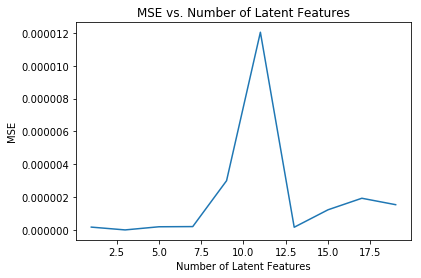

In [83]:
# Plot the Accurancy with N latent features
num_latent_features = np.arange(1,20,2)
sse_accum_list = []


for n in num_latent_features:
    # rebuilt FunkSVD with k latent features
    user_matrix, offer_matrix = fit(train_data_np, latent_features=n, learning_rate=0.005, iterations=250)
    
    # compute squared error
    see_accum=Validation(user_item_test,user_matrix, offer_matrix)
    sse_accum_list.append(see_accum)
       
plt.plot(num_latent_features, np.array(sse_accum_list));
plt.xlabel('Number of Latent Features');
plt.ylabel('MSE');
plt.title('MSE vs. Number of Latent Features');

In [84]:
# Fit FunkSVD with the specified hyper parameters to the training data
user_mat, offer_mat = fit(train_data_np, latent_features=13, learning_rate=0.005, iterations=250)

Optimization Statistics
Iterations | Mean Squared Error 
1 		 0.197956
2 		 0.151197
3 		 0.149424
4 		 0.147985
5 		 0.146576
6 		 0.145194
7 		 0.143836
8 		 0.142503
9 		 0.141194
10 		 0.139909
11 		 0.138648
12 		 0.137409
13 		 0.136192
14 		 0.134997
15 		 0.133824
16 		 0.132671
17 		 0.131539
18 		 0.130427
19 		 0.129334
20 		 0.128261
21 		 0.127206
22 		 0.126170
23 		 0.125152
24 		 0.124151
25 		 0.123168
26 		 0.122201
27 		 0.121251
28 		 0.120316
29 		 0.119398
30 		 0.118495
31 		 0.117606
32 		 0.116733
33 		 0.115874
34 		 0.115028
35 		 0.114197
36 		 0.113378
37 		 0.112573
38 		 0.111780
39 		 0.111000
40 		 0.110232
41 		 0.109476
42 		 0.108731
43 		 0.107997
44 		 0.107275
45 		 0.106563
46 		 0.105861
47 		 0.105170
48 		 0.104488
49 		 0.103816
50 		 0.103154
51 		 0.102500
52 		 0.101856
53 		 0.101220
54 		 0.100592
55 		 0.099973
56 		 0.099361
57 		 0.098757
58 		 0.098161
59 		 0.097572
60 		 0.096989
61 		 0.096414
62 		 0.095845
63 		 0.095283
64 		 0

In [79]:
def recommend(user_id,user_matrix,offer_matrix):
    recommend = {}
    
    for offer_id in user_item_train.columns:
        pred_value = predict(user_matrix, offer_matrix, user_id, offer_id)
        if pred_value != None:
            recommend[offer_id] = pred_value
        else:
            break
    if len(recommend) == 0:
        print("Since it's a new user, we provided the offer with the highest percent of effectiveness.")
        offer = portfolio.sort_values('effective_offer',ascending=False)
        for offer_id in offer['id']:
            print("offer id: ", offer_id, "effective percent: ",offer[offer['id']==offer_id]['effective_offer'].values[0])
    else:
        print("Ranked offer for user ", user_id)
        for offer_id, pred_value in sorted(recommend.items(), key=lambda r:(r[1], r[0]), reverse=True):
            print("offer id: ", offer_id, " predicted complete transactions: ", round(pred_val,2))

In [80]:
# Recommend for a particular user and we will recommend the one with the highest predicted value
recommend('0020c2b971eb4e9188eac86d93036a77',user_mat,offer_mat)

recommend offer for user  0020c2b971eb4e9188eac86d93036a77
offer id:  ae264e3637204a6fb9bb56bc8210ddfd  predicted value:  1.62
offer id:  4d5c57ea9a6940dd891ad53e9dbe8da0  predicted value:  1.05
offer id:  f19421c1d4aa40978ebb69ca19b0e20d  predicted value:  0.98
offer id:  fafdcd668e3743c1bb461111dcafc2a4  predicted value:  0.96
offer id:  2906b810c7d4411798c6938adc9daaa5  predicted value:  0.95
offer id:  0b1e1539f2cc45b7b9fa7c272da2e1d7  predicted value:  0.91
offer id:  9b98b8c7a33c4b65b9aebfe6a799e6d9  predicted value:  0.78
offer id:  2298d6c36e964ae4a3e7e9706d1fb8c2  predicted value:  0.77


In [81]:
# Recommend for a new user
recommend('fff3ba4757bd42088c044ca26d73817a',user_mat,offer_mat)

Since the user wasn't in our database, we provided the offer with the highest percent of effectiveness we calculated at the analysis stage.
offer id:  fafdcd668e3743c1bb461111dcafc2a4 effective percent:  0.71995009011507
offer id:  2298d6c36e964ae4a3e7e9706d1fb8c2 effective percent:  0.7002491004705231
offer id:  5a8bc65990b245e5a138643cd4eb9837 effective percent:  0.6036916395222585
offer id:  f19421c1d4aa40978ebb69ca19b0e20d effective percent:  0.596528365791702
offer id:  9b98b8c7a33c4b65b9aebfe6a799e6d9 effective percent:  0.5900086132644272
offer id:  3f207df678b143eea3cee63160fa8bed effective percent:  0.5846175204775788
offer id:  2906b810c7d4411798c6938adc9daaa5 effective percent:  0.54765003615329
offer id:  ae264e3637204a6fb9bb56bc8210ddfd effective percent:  0.4953426942861115
offer id:  4d5c57ea9a6940dd891ad53e9dbe8da0 effective percent:  0.45342560553633215
offer id:  0b1e1539f2cc45b7b9fa7c272da2e1d7 effective percent:  0.45036216446527483
